In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [22]:
df = pd.read_csv('Mall_Customers.csv')
df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



In [23]:
X = df.iloc[:,:].values
print(X)
X = pd.DataFrame(df, columns = df.iloc[:,:].columns)
X.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X.info()

[[1 'Male' 19 15 39]
 [2 'Male' 21 15 81]
 [3 'Female' 20 16 6]
 [4 'Female' 23 16 77]
 [5 'Female' 31 17 40]
 [6 'Female' 22 17 76]
 [7 'Female' 35 18 6]
 [8 'Female' 23 18 94]
 [9 'Male' 64 19 3]
 [10 'Female' 30 19 72]
 [11 'Male' 67 19 14]
 [12 'Female' 35 19 99]
 [13 'Female' 58 20 15]
 [14 'Female' 24 20 77]
 [15 'Male' 37 20 13]
 [16 'Male' 22 20 79]
 [17 'Female' 35 21 35]
 [18 'Male' 20 21 66]
 [19 'Male' 52 23 29]
 [20 'Female' 35 23 98]
 [21 'Male' 35 24 35]
 [22 'Male' 25 24 73]
 [23 'Female' 46 25 5]
 [24 'Male' 31 25 73]
 [25 'Female' 54 28 14]
 [26 'Male' 29 28 82]
 [27 'Female' 45 28 32]
 [28 'Male' 35 28 61]
 [29 'Female' 40 29 31]
 [30 'Female' 23 29 87]
 [31 'Male' 60 30 4]
 [32 'Female' 21 30 73]
 [33 'Male' 53 33 4]
 [34 'Male' 18 33 92]
 [35 'Female' 49 33 14]
 [36 'Female' 21 33 81]
 [37 'Female' 42 34 17]
 [38 'Female' 30 34 73]
 [39 'Female' 36 37 26]
 [40 'Female' 20 37 75]
 [41 'Female' 65 38 35]
 [42 'Male' 24 38 92]
 [43 'Male' 48 39 36]
 [44 'Female' 31 39

In [25]:
X['Gender'] = X['Gender'].astype('bool')
X['Gender'] = X['Gender'].astype('int')
print(X)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [26]:
X = X.replace(' ', np.nan)
X.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
from sklearn.cluster import KMeans
?KMeans

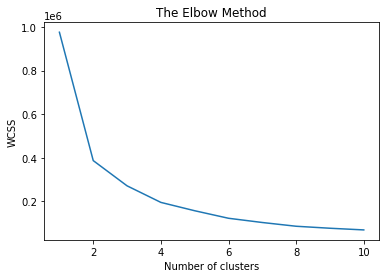

In [28]:
# Using the elbow method to find  the optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#?KMeans
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
df['Target'] = y_kmeans
print(df.head(50))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0            1       1   19                  15                      39   
1            2       1   21                  15                      81   
2            3       1   20                  16                       6   
3            4       1   23                  16                      77   
4            5       1   31                  17                      40   
5            6       1   22                  17                      76   
6            7       1   35                  18                     

In [37]:
X[y_kmeans == 0]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
62,63,1,67,47,52
63,64,1,54,47,59
64,65,1,63,48,51
65,66,1,18,48,59
66,67,1,43,48,50
...,...,...,...,...,...
127,128,1,40,71,95
128,129,1,59,71,11
129,130,1,38,71,75
130,131,1,47,71,9


In [38]:
X[y_kmeans == 1]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
57,58,1,69,44,46
58,59,1,27,46,51
59,60,1,53,46,46
60,61,1,70,46,56


In [39]:
X[y_kmeans == 2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
132,133,1,25,72,34
133,134,1,31,72,71
134,135,1,20,73,5
135,136,1,29,73,88
136,137,1,44,73,7
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [36]:
df.to_csv(r'Mall_Customers_cluster.csv',index = False, header=True)